In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from yellowbrick.model_selection import FeatureImportances
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt

/tmp/ipykernel_1574/682116737.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("high_diamond_ranked_10min.csv")

In [3]:
df.shape

(9879, 40)

In [4]:
df.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

## Preprocessing

In [5]:
# no duplicates
df = df.drop_duplicates(subset=["gameId"])

In [6]:
# Drop unnecessary columns
df = df.drop(columns = ["gameId"])

# Drop complementary columns
df = df.drop(columns = ["redFirstBlood", "redGoldDiff", "redExperienceDiff"])

In [7]:
df.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redCSPerMin,redGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,...,0,0,0,16567,6.8,17047,197,55,19.7,1656.7
1,0,12,1,0,5,5,5,0,0,0,...,1,1,1,17620,6.8,17438,240,52,24.0,1762.0
2,0,15,0,0,7,11,4,1,1,0,...,0,0,0,17285,6.8,17254,203,28,20.3,1728.5
3,0,43,1,0,4,5,5,1,0,1,...,0,0,0,16478,7.0,17961,235,47,23.5,1647.8
4,0,75,4,0,6,6,6,0,0,0,...,1,0,0,17404,7.0,18313,225,67,22.5,1740.4


In [8]:
print(df.isnull().sum()[df.isnull().sum() > 0])

Series([], dtype: int64)


In [9]:
corr = df.corr()
high_corr_columns = []

for i, column in enumerate(corr.columns):
    for j, row in enumerate(corr.columns):
        if i < j and abs(corr.at[row, column]) >= 0.8:
            high_corr_columns.append((column, row))

print(high_corr_columns)

[('blueKills', 'blueAssists'), ('blueKills', 'blueTotalGold'), ('blueKills', 'blueGoldPerMin'), ('blueKills', 'redDeaths'), ('blueDeaths', 'redKills'), ('blueDeaths', 'redAssists'), ('blueDeaths', 'redTotalGold'), ('blueDeaths', 'redGoldPerMin'), ('blueAssists', 'redDeaths'), ('blueTotalGold', 'blueGoldDiff'), ('blueTotalGold', 'blueGoldPerMin'), ('blueTotalGold', 'redDeaths'), ('blueAvgLevel', 'blueTotalExperience'), ('blueTotalExperience', 'blueExperienceDiff'), ('blueTotalMinionsKilled', 'blueCSPerMin'), ('blueGoldDiff', 'blueExperienceDiff'), ('blueGoldDiff', 'blueGoldPerMin'), ('blueGoldDiff', 'redTotalGold'), ('blueGoldDiff', 'redGoldPerMin'), ('blueExperienceDiff', 'redTotalExperience'), ('blueGoldPerMin', 'redDeaths'), ('redKills', 'redAssists'), ('redKills', 'redTotalGold'), ('redKills', 'redGoldPerMin'), ('redEliteMonsters', 'redDragons'), ('redTotalGold', 'redGoldPerMin'), ('redAvgLevel', 'redTotalExperience'), ('redTotalMinionsKilled', 'redCSPerMin')]


In [10]:
corr

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redCSPerMin,redGoldPerMin
blueWins,1.000000,0.000087,0.044247,0.201769,0.337358,-0.339297,0.276685,0.221944,0.213768,0.092385,...,-0.209516,-0.097172,-0.103696,-0.411396,-0.352127,-0.387588,-0.212171,-0.110994,-0.212171,-0.411396
blueWardsPlaced,0.000087,1.000000,0.034447,0.003228,0.018138,-0.002612,0.033217,0.019892,0.017676,0.010104,...,-0.020121,-0.011964,-0.008225,-0.005685,-0.008882,-0.013000,-0.012395,0.001224,-0.012395,-0.005685
blueWardsDestroyed,0.044247,0.034447,1.000000,0.017717,0.033748,-0.073182,0.067793,0.041700,0.040504,0.016940,...,-0.034439,-0.012712,-0.023943,-0.067467,-0.059090,-0.057314,0.040023,-0.035732,0.040023,-0.067467
blueFirstBlood,0.201769,0.003228,0.017717,1.000000,0.269425,-0.247929,0.229485,0.151603,0.134309,0.077509,...,-0.135327,-0.060246,-0.069584,-0.301479,-0.182602,-0.194920,-0.156711,-0.024559,-0.156711,-0.301479
blueKills,0.337358,0.018138,0.033748,0.269425,1.000000,0.004044,0.813667,0.178540,0.170436,0.076195,...,-0.207949,-0.104423,-0.082491,-0.161127,-0.412219,-0.462333,-0.472203,-0.214454,-0.472203,-0.161127
blueDeaths,-0.339297,-0.002612,-0.073182,-0.247929,0.004044,1.000000,-0.026372,-0.204764,-0.188852,-0.095527,...,0.150746,0.076639,0.156780,0.885728,0.433383,0.464584,-0.040521,-0.100271,-0.040521,0.885728
blueAssists,0.276685,0.033217,0.067793,0.229485,0.813667,-0.026372,1.000000,0.149043,0.170873,0.028434,...,-0.189563,-0.058074,-0.060880,-0.133948,-0.356928,-0.396652,-0.337515,-0.160915,-0.337515,-0.133948
blueEliteMonsters,0.221944,0.019892,0.041700,0.151603,0.178540,-0.204764,0.149043,1.000000,0.781039,0.640271,...,-0.471754,-0.144104,-0.052029,-0.216616,-0.169649,-0.189816,-0.074838,-0.087893,-0.074838,-0.216616
blueDragons,0.213768,0.017676,0.040504,0.134309,0.170436,-0.188852,0.170873,0.781039,1.000000,0.020381,...,-0.631930,-0.016827,-0.032865,-0.192871,-0.149806,-0.159485,-0.059803,-0.098446,-0.059803,-0.192871
blueHeralds,0.092385,0.010104,0.016940,0.077509,0.076195,-0.095527,0.028434,0.640271,0.020381,1.000000,...,0.022035,-0.210012,-0.042872,-0.109557,-0.087337,-0.107718,-0.046253,-0.019622,-0.046253,-0.109557


In [82]:
y = df["blueWins"]
X = df.drop(columns = ["blueWins"])

# train test split
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Test validation split
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

In [83]:
# Normalization => std
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

## Feature Selection

In [94]:
rf = RandomForestClassifier(n_estimators=40, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=40, random_state=42)

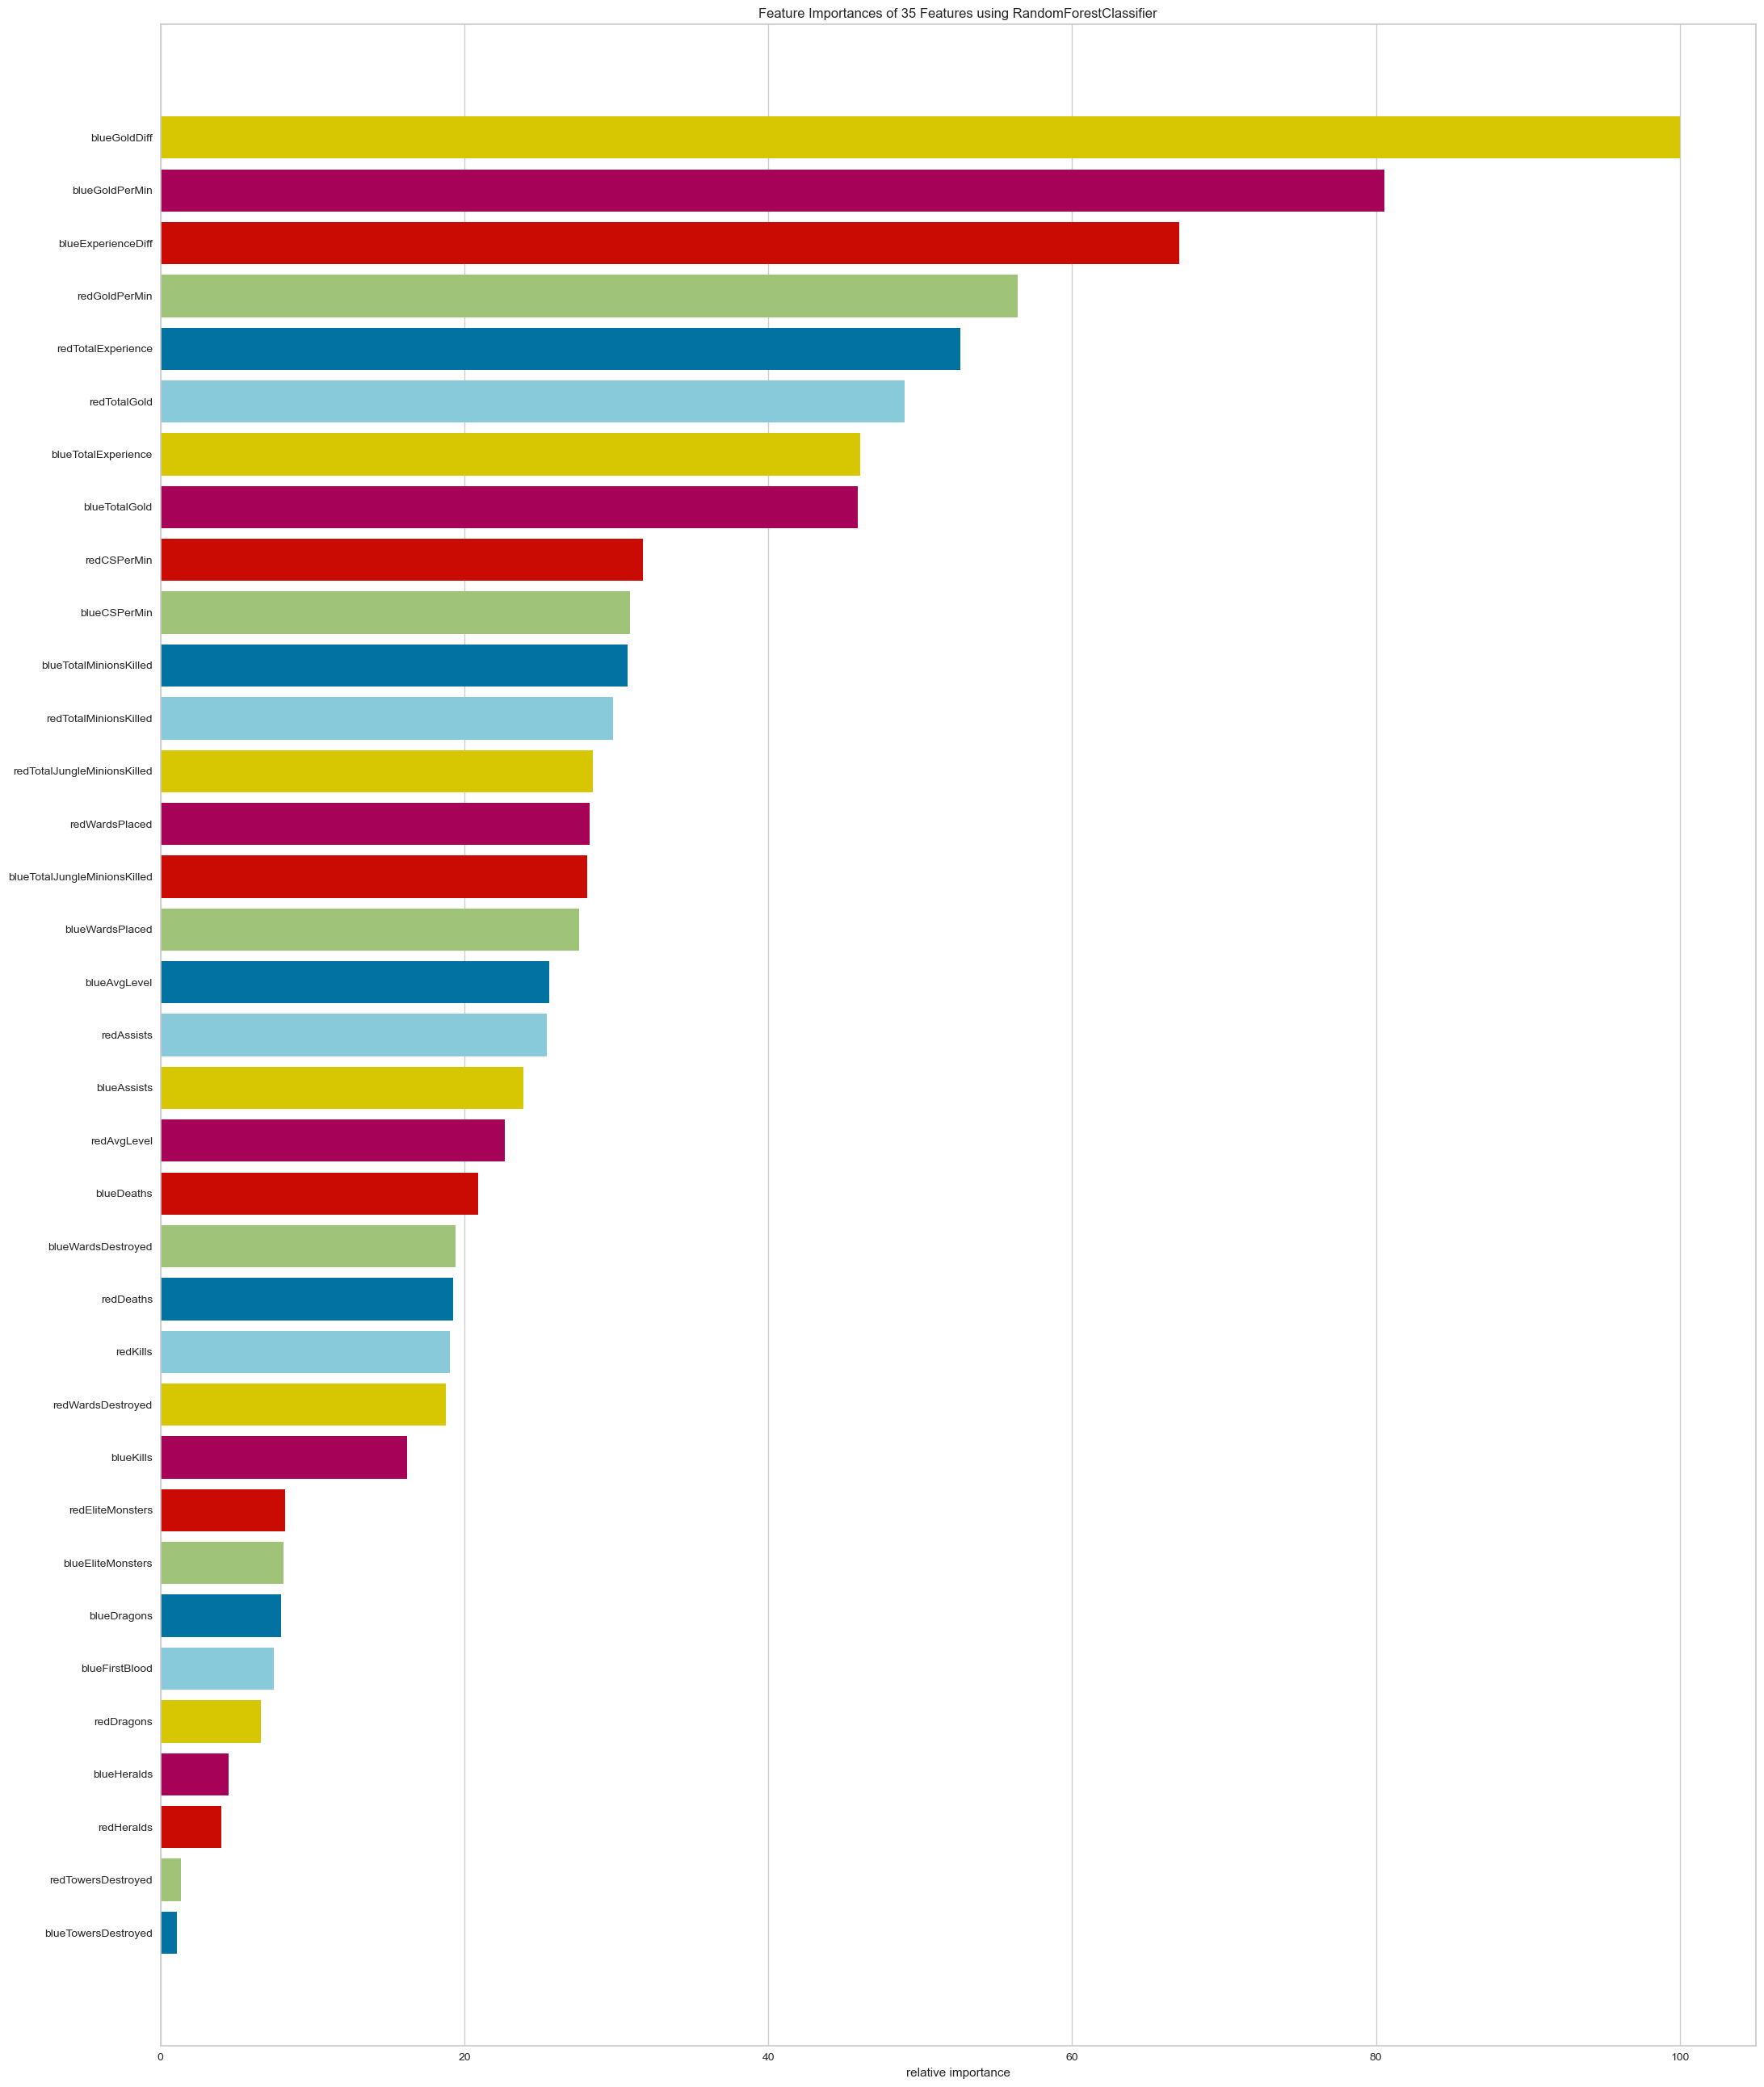

blueGoldDiff     0.101
blueGoldPerMin     0.081
blueExperienceDiff     0.067
redGoldPerMin     0.057
redTotalExperience     0.053


In [97]:
fig = plt.figure(figsize=(22, 26))
viz = FeatureImportances(rf, labels=X.columns)
viz.fit(X_train, y_train)
viz.poof()
for col, val in sorted(
        zip(
            X.columns,
            rf.feature_importances_,
        ),
        key=lambda x: x[1],
        reverse=True,
)[:5]:
    print(f"{col:10}{val:10.3f}")

## Modeling